In [20]:
import numpy as np

def f(x):
    return 2*x**4 - 8*x**3 - 16*x**2 - 1

def derivative(x):
    return 8*x**3 - 24*x**2 - 32*x

def bisection_method(a, b, tolerance):
    while (b - a) / 2 > tolerance:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

def chord_method(a, b, tolerance):
    x0 = a
    x1 = b
    while abs(x1 - x0) > tolerance:
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        x0, x1 = x1, x2
    return x1

def newton_method(initial_guess, tolerance):
    x0 = initial_guess
    while abs(f(x0)) > tolerance:
        x0 = x0 - f(x0) / derivative(x0)
    return x0

def combined_method(a, b, tolerance):
    x0 = (a + b) / 2
    while abs(f(x0)) > tolerance:
 
        df = derivative(x0)
        if abs(df) < 1e-8:
            break
        x1 = x0 - f(x0) / df
        x0 = x1 if f(x1) * f(x0) < 0 else (x0 + x1) / 2
    return x0

tolerance = 0.001

bisection_root = bisection_method(-2, 0, tolerance)

chord_root = chord_method(-2, 0, tolerance)

newton_root = newton_method(-2, tolerance)

combined_root = combined_method(-2, 0, tolerance)

print(f"Метод половинного ділення: {bisection_root:.4f}")
print(f"Метод хорд: {chord_root:.4f}")
print(f"Метод Ньютона: {newton_root:.4f}")
print(f"Комбінований метод: {combined_root:.4f}")
for root in [bisection_root, chord_root, newton_root, combined_root]:
    print(f"Перевірка для x = {root}: {f(root):.4f}")


Метод половинного ділення: -1.4971
Метод хорд: -1.4962
Метод Ньютона: -1.4962
Комбінований метод: -1.0000
Перевірка для x = -1.4970703125: 0.0287
Перевірка для x = -1.4961914895494903: -0.0000
Перевірка для x = -1.4961950822267374: 0.0001
Перевірка для x = -1.0: -7.0000


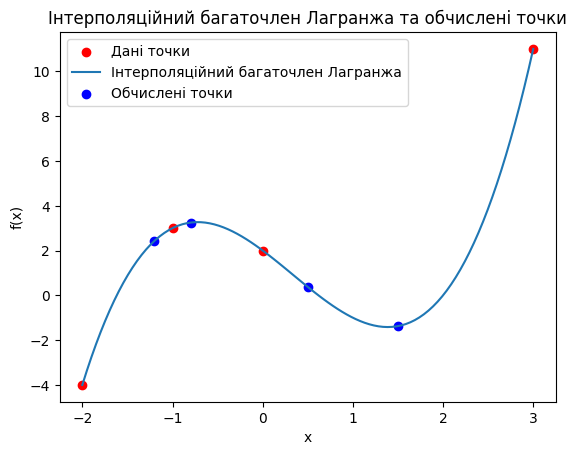

f(-1.2) ≈ 2.432
f(-0.8) ≈ 3.248
f(0.5) ≈ 0.375
f(1.5) ≈ -1.375


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x_points = np.array([-2, -1, 0, 3, -1.5, -0.5, 1, 2])
y_points = np.array([-4, 3, 2, 11, None, None, None, None])  

valid_indices = np.where(y_points != None)[0]
x_valid = x_points[valid_indices]
y_valid = y_points[valid_indices]

def lagrange_interpolation(x, x_points, y_points):
    poly = lagrange(x_points, y_points)
    return poly(x)

x_eval = np.array([-1.2, -0.8, 0.5, 1.5])
y_interp = lagrange_interpolation(x_eval, x_valid, y_valid)

x_range = np.linspace(min(x_points), max(x_points), 100)
y_range = lagrange_interpolation(x_range, x_valid, y_valid)

plt.scatter(x_valid, y_valid, color='red', label='Дані точки')
plt.plot(x_range, y_range, label='Інтерполяційний багаточлен Лагранжа')
plt.scatter(x_eval, y_interp, color='blue', label='Обчислені точки')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Інтерполяційний багаточлен Лагранжа та обчислені точки')
plt.show()

for i, x in enumerate(x_eval):
    print(f'f({x}) ≈ {y_interp[i]:.3f}')


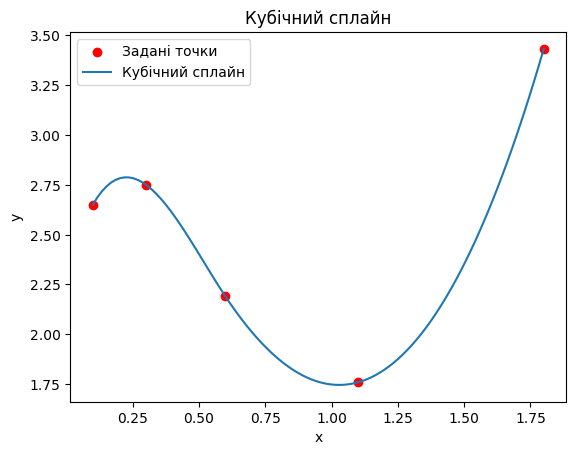

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x_values = [0.1, 0.3, 0.6, 1.1, 1.8]
y_values = [2.65, 2.75, 2.19, 1.76, 3.43]

spline = CubicSpline(x_values, y_values)

x_smooth = np.linspace(min(x_values), max(x_values), 100)
y_smooth = spline(x_smooth)

plt.scatter(x_values, y_values, color='red', label='Задані точки')
plt.plot(x_smooth, y_smooth, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Кубічний сплайн')
plt.show()


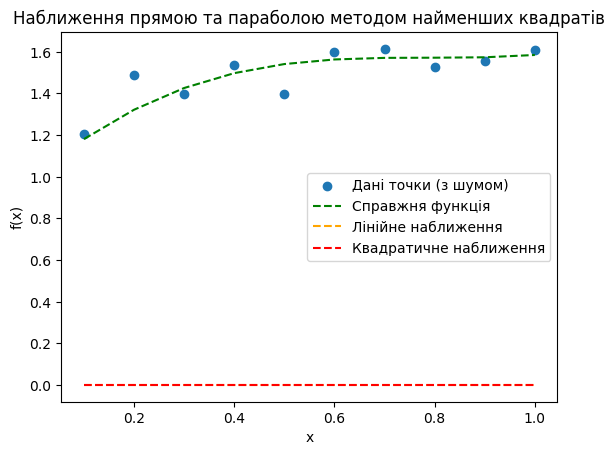

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def true_function(x):
    return np.cos(2*x) + 2*x

start_x = 0.1
end_x = 1.0
step = 0.1

x_data = np.arange(start_x, end_x + step, step)
y_data = true_function(x_data) + np.random.normal(scale=0.1, size=len(x_data)) 

def linear_function(params, x):
    return params[0] * x + params[1]

def quadratic_function(params, x):
    return params[0] * x**2 + params[1] * x + params[2]

initial_params_linear = [1, 1]
initial_params_quadratic = [1, 1, 1]

result_linear = least_squares(linear_function, initial_params_linear, args=(x_data,), bounds=(-np.inf, np.inf), method='trf', loss='soft_l1')
result_quadratic = least_squares(quadratic_function, initial_params_quadratic, args=(x_data,), bounds=(-np.inf, np.inf), method='trf', loss='soft_l1')

params_linear = result_linear.x
params_quadratic = result_quadratic.x

approximation_linear = lambda x: linear_function(params_linear, x)
approximation_quadratic = lambda x: quadratic_function(params_quadratic, x)

plt.scatter(x_data, y_data, label='Дані точки (з шумом)')
plt.plot(x_data, true_function(x_data), label='Справжня функція', linestyle='--', color='green')
plt.plot(x_data, approximation_linear(x_data), label='Лінійне наближення', linestyle='--', color='orange')
plt.plot(x_data, approximation_quadratic(x_data), label='Квадратичне наближення', linestyle='--', color='red')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Наближення прямою та параболою методом найменших квадратів')
plt.show()


In [30]:
import numpy as np

def f(x):
    return 1 / np.sqrt(2*x + 3)

a = 0.8
b = 1.4

n = 10

h = (b - a) / n

integral_approximation = 0
for i in range(n):
    x_i = a + i * h + h / 2  
    integral_approximation += f(x_i) * h

print("Наближене значення інтегралу методом прямокутників:", integral_approximation)


Наближене значення інтегралу методом прямокутників: 0.26355339219129414


In [32]:
import numpy as np

def f(x):
    return np.sqrt(x) * np.cos(x**2)

a = 0.4
b = 1.2

p = 8
n = 2 * p

h = (b - a) / n

integral_approximation = 0
for i in range(1, n, 2):
    x_i = a + i * h  
    integral_approximation += 4 * f(x_i)
for i in range(2, n-1, 2):
    x_i = a + i * h  
    integral_approximation += 2 * f(x_i)

integral_approximation = (h / 3) * (f(a) + f(b) + integral_approximation)

print("Наближене значення інтегралу методом Сімпсона:", integral_approximation)


Наближене значення інтегралу методом Сімпсона: 0.48410667699534343


In [33]:
import numpy as np

def f(x):
    return 1 / np.sqrt(3*x**2 - 0.4)

a = 1.3
b = 2.1

p = 20
n = 2 * p

h = (b - a) / n

integral_approximation = (f(a) + f(b)) / 2
for i in range(1, n):
    x_i = a + i * h
    integral_approximation += f(x_i)

integral_approximation *= h

print("Наближене значення інтегралу методом трапецій:", integral_approximation)


Наближене значення інтегралу методом трапецій: 0.2842157529206342
